In [1]:
#Import Statements
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import (precision_recall_curve, average_precision_score, PrecisionRecallDisplay)
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

import keras
from keras import layers

### Loading Tox21 dataset using SmilesToImage featuriser

Tox21 Assay List: <br>
<ol>
    <li> NR-AR </li>
    <li> NR-AR-LBD </li>
    <li> NR-AhR </li>
    <li> NR-Aromatase </li>
    <li> NR-ER </li>
    <li> NR-ER-LBD </li>
    <li> NR-PPAR-gamma </li>
    <li> SR-ARE </li>
    <li> SR-ATAD5 </li>
    <li> SR-HSE </li>
    <li> SR-MMP </li>
    <li> SR-p53 </li>
</ol>

In [2]:
# dc.__version__

In [3]:
#Testing NN with SmilesToImage featuriser
tasks, datasets, transformers = dc.molnet.load_tox21(
    featurizer = dc.feat.SmilesToImage(img_size=80, img_spec='std'),
    save_dir=r'C:\Users\ym20201\Documents\Datasets',
    data_dir=r'C:\Users\ym20201\Documents\Datasets')

splitter = dc.splits.RandomSplitter()
# featurizer = dc.feat.SmilesToImage(img_size=80, img_spec='std')

# datasets = tf.data.Dataset.range(3)

#Split dataset into train,valid,test datasets
# train_data, valid_data,test_data = splitter.train_valid_test_split(
#     datasets[0], 
#     frac_train = 0.8, frac_valid = 0.08, frac_test = 0.12)

train_data, valid_data, test_data = datasets

### DeepChem CNN model

In [4]:
#Workshop model
#Mark which are default
smiles2img_model = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1, 
    layer_filters=[100,100],
    strides=1,
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    weight_decay_penalty=0.0,
    weight_decay_penalty_type='12',
    dropouts=0.5,
    dense_layer_size=[500,200],
    activation_fns=['relu'],
    uncertainty=False,
    residual=False,
    padding='valid') #no padding

In [5]:
#Model 1
smiles2img_model1 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filters=[100,100],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200],
    activation_fns=['relu'],
    uncertainty=False,
    residual=False,
    padding='valid') 

In [6]:
#Model 2
smiles2img_model2 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filters=[100,100],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[1000,500], #increased layer size
    activation_fns=['relu'],
    uncertainty=False,
    residual=False,
    padding='valid') 

In [7]:
#Model 3 - Model 1 with max pooling layer
smiles2img_model3 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filters=[100,100],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200], 
    activation_fns=['relu'],
    uncertainty=False,
    pool_type='max',
    residual=False,
    padding='valid') 

In [8]:
#Model 4
smiles2img_model4 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filter=[1000,500,100], 
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200,200],
    activation_fns=['relu'],
    uncertainty=False,
    residual=False,
    padding='valid') 

In [9]:
#Model 5 - model 4 with max pooling
smiles2img_model5 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filter=[1000,500,100], 
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200,200],
    activation_fns=['relu'],
    uncertainty=False,
    pool_type='max',
    residual=False,
    padding='valid') 

In [10]:
#Model 6
smiles2img_model6 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filter=[500,500,200],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=[0.5, 0.0,0.0],
    dense_layer_size=[500,200,100],
    activation_fns=['relu'],
    uncertainty=False,
    pool_type='max',
    residual=False,
    padding='valid') 

In [11]:
#Model 7
smiles2img_model7 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filter=[500,500,200],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200,100],
    activation_fns=['relu'],
    uncertainty=False,
    pool_type='max',
    residual=False,
    padding='valid') 

In [12]:
#Best performance models - Models 2, 5, 7
smiles2img_model2.fit(
    train_data,
    nb_epoch=10)

smiles2img_model5.fit(
    train_data,
    nb_epoch=10)

smiles2img_model7.fit(
    train_data,
    nb_epoch=10)

0.9360309600830078

In [13]:
#Evaluation Metrics

metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
metric1 = dc.metrics.Metric(dc.metrics.balanced_accuracy_score)
metric2 = dc.metrics.Metric(dc.metrics.recall_score)
metric3 = dc.metrics.Metric(dc.metrics.f1_score)



In [162]:
smiles2img_model7.evaluate(test_data, [metric, metric1, metric2, metric3], transformers)

{'roc_auc_score': 0.5559201446062745,
 'balanced_accuracy_score': 0.5264097189714043,
 'recall_score': 0.6648500162496445,
 'f1_score': 0.13031792354735663}

In [16]:
#Using the models for prediction
m2_pred_data = smiles2img_model2.predict(test_data)
m5_pred_data = smiles2img_model5.predict(test_data)
m7_pred_data = smiles2img_model7.predict(test_data)

In [17]:
#Function for accessing y_true of each assay
def y_true(assay_num, test_data):
    y_true = []
    for i in range(len(test_data.y)):
        y_true.append(test_data.y[i][assay_num - 1])
        
    return y_true

def y_pred(assay_num, pred_data):
    y_pred = []
    for i in range(len(pred_data)):
        y_pred.append( pred_data[i][assay_num - 1][0])
#         y_pred = pred_data[i][assay_num - 1] #not sure which one
    
    return y_pred

In [18]:
#y_true of each assay
y_true_1 = y_true(1, test_data)
y_true_2 = y_true(2, test_data)
y_true_3 = y_true(3, test_data)
y_true_4 = y_true(4, test_data)
y_true_5 = y_true(5, test_data)
y_true_6 = y_true(6, test_data)
y_true_7 = y_true(7, test_data)
y_true_8 = y_true(8, test_data)
y_true_9 = y_true(9, test_data)
y_true_10 = y_true(10, test_data)
y_true_11 = y_true(11, test_data)
y_true_12 = y_true(12, test_data)

# y_true_3 = [test_data.y[i][2] for i in range(len(test_data.y))]

In [19]:
y_true = [y_true_1, y_true_2, y_true_3, y_true_4, y_true_5, 
        y_true_6, y_true_7, y_true_8, y_true_9, y_true_10,
        y_true_11, y_true_12]

### Model 2 - y_pred

In [20]:
#y_pred of each assay
m2_y_pred_1 = y_pred(1, m2_pred_data)
m2_y_pred_2 = y_pred(2, m2_pred_data)
m2_y_pred_3 = y_pred(3, m2_pred_data)
m2_y_pred_4 = y_pred(4, m2_pred_data)
m2_y_pred_5 = y_pred(5, m2_pred_data)
m2_y_pred_6 = y_pred(6, m2_pred_data)
m2_y_pred_7 = y_pred(7, m2_pred_data)
m2_y_pred_8 = y_pred(8, m2_pred_data)
m2_y_pred_9 = y_pred(9, m2_pred_data)
m2_y_pred_10 = y_pred(10, m2_pred_data)
m2_y_pred_11 = y_pred(11, m2_pred_data)
m2_y_pred_12 = y_pred(12, m2_pred_data)

# pred_data_3 = [pred_data[i][3][0] for i in range(len(pred_data))]

In [21]:
def round_pred(y_pred):
    y_pred_new = []
    for i in range(len(y_pred)):
        if y_pred[i] < 0.5:
            new = 0
        else:
            new = 1
        y_pred_new.append(new)
    return y_pred_new

In [22]:
#Rounding predicted probabilities to binary values
m2_y_pred_new_1 = round_pred(m2_y_pred_1)
m2_y_pred_new_2 = round_pred(m2_y_pred_2)
m2_y_pred_new_3 = round_pred(m2_y_pred_3)
m2_y_pred_new_4 = round_pred(m2_y_pred_4)
m2_y_pred_new_5 = round_pred(m2_y_pred_5)
m2_y_pred_new_6 = round_pred(m2_y_pred_6)
m2_y_pred_new_7= round_pred(m2_y_pred_7)
m2_y_pred_new_8 = round_pred(m2_y_pred_8)
m2_y_pred_new_9 = round_pred(m2_y_pred_9)
m2_y_pred_new_10 = round_pred(m2_y_pred_10)
m2_y_pred_new_11 = round_pred(m2_y_pred_11)
m2_y_pred_new_12 = round_pred(m2_y_pred_12)

In [23]:
m2_y_pred = [m2_y_pred_1, m2_y_pred_2, m2_y_pred_3, m2_y_pred_4, m2_y_pred_5, 
             m2_y_pred_6, m2_y_pred_7, m2_y_pred_8, m2_y_pred_9, m2_y_pred_10,
            m2_y_pred_11, m2_y_pred_12]

m2_y_pred_new = [m2_y_pred_new_1, m2_y_pred_new_2, m2_y_pred_new_3, m2_y_pred_new_4, m2_y_pred_new_5, 
             m2_y_pred_new_6, m2_y_pred_new_7, m2_y_pred_new_8, m2_y_pred_new_9, m2_y_pred_new_10,
            m2_y_pred_new_11, m2_y_pred_new_12]

### Model 5 - y_pred

In [24]:
#y_pred of each assay
m5_y_pred_1 = y_pred(1, m5_pred_data)
m5_y_pred_2 = y_pred(2, m5_pred_data)
m5_y_pred_3 = y_pred(3, m5_pred_data)
m5_y_pred_4 = y_pred(4, m5_pred_data)
m5_y_pred_5 = y_pred(5, m5_pred_data)
m5_y_pred_6 = y_pred(6, m5_pred_data)
m5_y_pred_7 = y_pred(7, m5_pred_data)
m5_y_pred_8 = y_pred(8, m5_pred_data)
m5_y_pred_9 = y_pred(9, m5_pred_data)
m5_y_pred_10 = y_pred(10, m5_pred_data)
m5_y_pred_11 = y_pred(11, m5_pred_data)
m5_y_pred_12 = y_pred(12, m5_pred_data)

In [25]:
#Rounding predicted probabilities to binary values
m5_y_pred_new_1 = round_pred(m5_y_pred_1)
m5_y_pred_new_2 = round_pred(m5_y_pred_2)
m5_y_pred_new_3 = round_pred(m5_y_pred_3)
m5_y_pred_new_4 = round_pred(m5_y_pred_4)
m5_y_pred_new_5 = round_pred(m5_y_pred_5)
m5_y_pred_new_6 = round_pred(m5_y_pred_6)
m5_y_pred_new_7= round_pred(m5_y_pred_7)
m5_y_pred_new_8 = round_pred(m5_y_pred_8)
m5_y_pred_new_9 = round_pred(m5_y_pred_9)
m5_y_pred_new_10 = round_pred(m5_y_pred_10)
m5_y_pred_new_11 = round_pred(m5_y_pred_11)
m5_y_pred_new_12 = round_pred(m5_y_pred_12)

In [26]:
m5_y_pred = [m5_y_pred_1, m5_y_pred_2, m5_y_pred_3, m5_y_pred_4, m5_y_pred_5, 
             m5_y_pred_6, m5_y_pred_7, m5_y_pred_8, m5_y_pred_9, m5_y_pred_10,
            m5_y_pred_11, m5_y_pred_12]

m5_y_pred_new = [m5_y_pred_new_1, m5_y_pred_new_2, m5_y_pred_new_3, m5_y_pred_new_4, m5_y_pred_new_5, 
             m5_y_pred_new_6, m5_y_pred_new_7, m5_y_pred_new_8, m5_y_pred_new_9, m5_y_pred_new_10,
            m5_y_pred_new_11, m5_y_pred_new_12]

### Model 7 - y_pred

In [27]:
#y_pred of each assay
m7_y_pred_1 = y_pred(1, m7_pred_data)
m7_y_pred_2 = y_pred(2, m7_pred_data)
m7_y_pred_3 = y_pred(3, m7_pred_data)
m7_y_pred_4 = y_pred(4, m7_pred_data)
m7_y_pred_5 = y_pred(5, m7_pred_data)
m7_y_pred_6 = y_pred(6, m7_pred_data)
m7_y_pred_7 = y_pred(7, m7_pred_data)
m7_y_pred_8 = y_pred(8, m7_pred_data)
m7_y_pred_9 = y_pred(9, m7_pred_data)
m7_y_pred_10 = y_pred(10, m7_pred_data)
m7_y_pred_11 = y_pred(11, m7_pred_data)
m7_y_pred_12 = y_pred(12, m7_pred_data)

In [28]:
#Rounding predicted probabilities to binary values
m7_y_pred_new_1 = round_pred(m7_y_pred_1)
m7_y_pred_new_2 = round_pred(m7_y_pred_2)
m7_y_pred_new_3 = round_pred(m7_y_pred_3)
m7_y_pred_new_4 = round_pred(m7_y_pred_4)
m7_y_pred_new_5 = round_pred(m7_y_pred_5)
m7_y_pred_new_6 = round_pred(m7_y_pred_6)
m7_y_pred_new_7= round_pred(m7_y_pred_7)
m7_y_pred_new_8 = round_pred(m5_y_pred_8)
m7_y_pred_new_9 = round_pred(m7_y_pred_9)
m7_y_pred_new_10 = round_pred(m7_y_pred_10)
m7_y_pred_new_11 = round_pred(m7_y_pred_11)
m7_y_pred_new_12 = round_pred(m7_y_pred_12)

In [29]:
m7_y_pred = [m7_y_pred_1, m7_y_pred_2, m7_y_pred_3, m7_y_pred_4, m7_y_pred_5, 
             m7_y_pred_6, m7_y_pred_7, m7_y_pred_8, m7_y_pred_9, m7_y_pred_10,
            m7_y_pred_11, m7_y_pred_12]

m7_y_pred_new = [m7_y_pred_new_1, m7_y_pred_new_2, m7_y_pred_new_3, m7_y_pred_new_4, m7_y_pred_new_5, 
             m7_y_pred_new_6, m7_y_pred_new_7, m7_y_pred_new_8, m7_y_pred_new_9, m7_y_pred_new_10,
            m7_y_pred_new_11, m7_y_pred_new_12]

## Evaluating the model

### Precision and Recall score

In [30]:
#Function to ouput precision, recall, and average precision score
def precision_recall_avgprecision(y_true, y_pred):
    precision_score = []
    recall_score = []
    avg_precision_score = []
    for i in range(len(y_true)):
        precision, recall, _ = precision_recall_curve(y_true[i], y_pred[i])
        avg_precision = average_precision_score(y_true[i], y_pred[i])
        
        precision_score.append(precision)
        recall_score.append(recall)
        avg_precision_score.append(avg_precision)
    
    return precision_score, recall_score, avg_precision_score


In [31]:
def PrecisionRecallPlot(precision, recall, avg, assays):
    precision_recall = []
    for i in range(len(precision)):
        plot = PrecisionRecallDisplay(recall = recall[i], precision = precision[i], average_precision = avg[i])
        precision_recall.append(plot)
        
    for i in range(len(precision_recall)):
        precision_recall[i].plot(ax=ax, label=assays[i])

In [32]:
m2_precision_score, m2_recall_score, m2_avg_precision_score = precision_recall_avgprecision(y_true, m2_y_pred)
m5_precision_score, m5_recall_score, m5_avg_precision_score = precision_recall_avgprecision(y_true, m5_y_pred)
m7_precision_score, m7_recall_score, m7_avg_precision_score = precision_recall_avgprecision(y_true, m7_y_pred)

In [33]:
assays = ['NR-AR', 'NR-AR-LBD','NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
         'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']

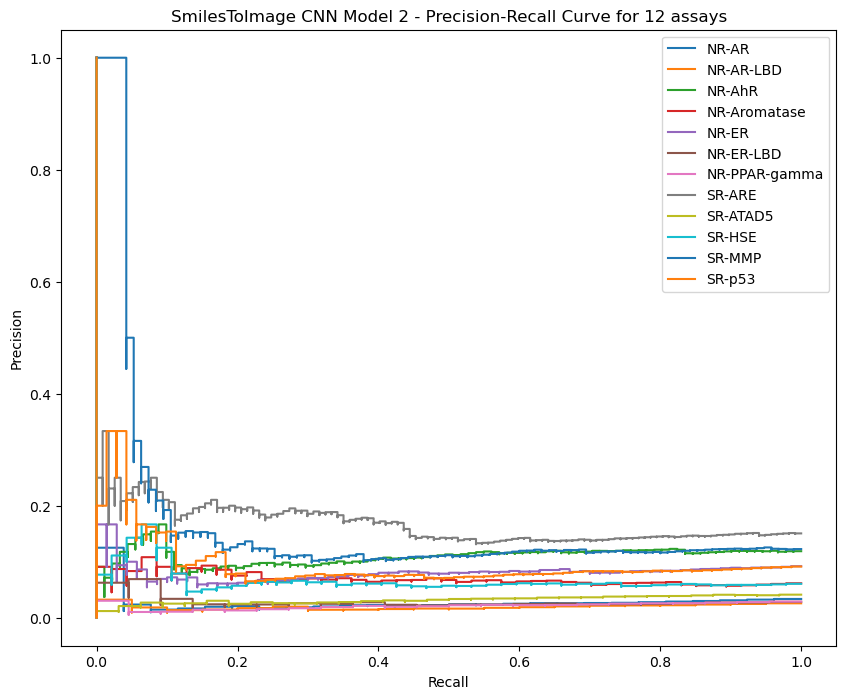

In [77]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m2_precision_score, m2_recall_score, m2_avg_precision_score, assays)

plt.title('SmilesToImage CNN Model 2 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')
plt.savefig('Smiles2IMG M2 P-R.png')

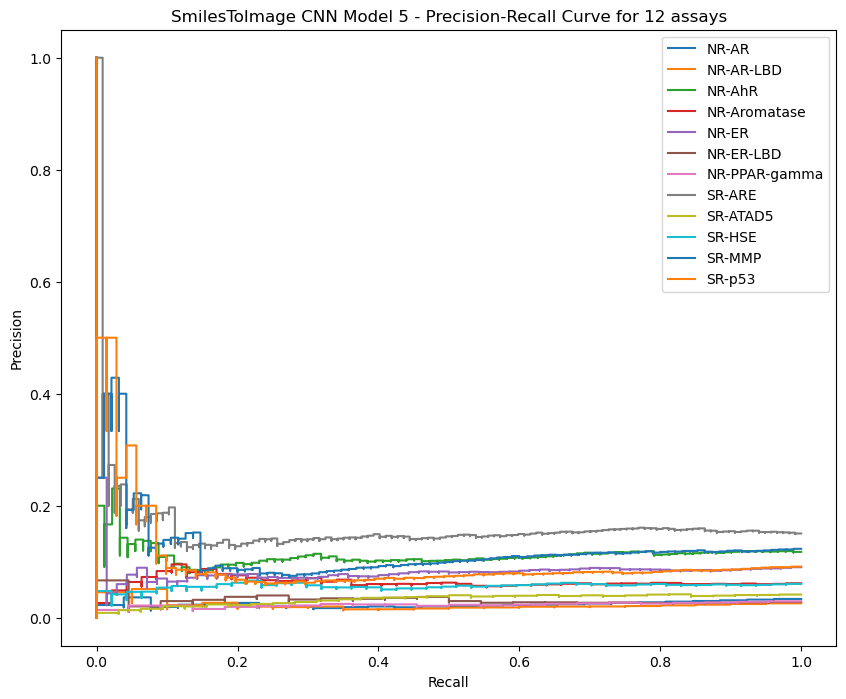

In [78]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m5_precision_score, m5_recall_score, m5_avg_precision_score, assays)

plt.title('SmilesToImage CNN Model 5 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')
plt.savefig('Smiles2IMG M5 P-R.png')

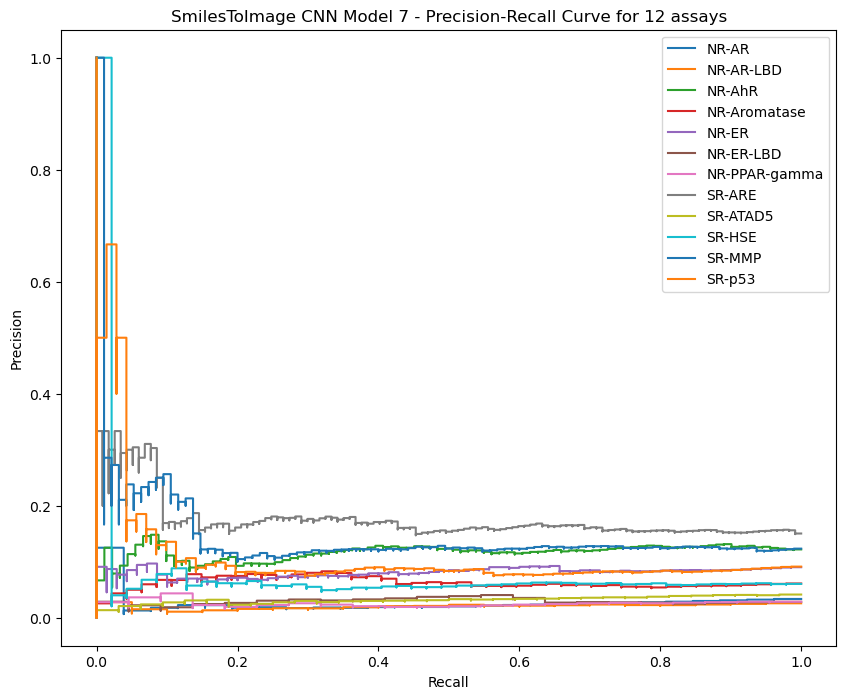

In [79]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m7_precision_score, m7_recall_score, m7_avg_precision_score, assays)

plt.title('SmilesToImage CNN Model 7 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')
plt.savefig('Smiles2IMG M7 P-R.png')

### Accuracy or Balanced Accuracy Score?

In [37]:
# #Is tox21 balanced or imbalanced?

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import balanced_accuracy_score

# #NR-AR Assay
# acc = accuracy_score(y_true_1, y_pred_new_1)
# b_acc = balanced_accuracy_score(y_true_1, y_pred_new_1)

# #NR-AR-LBD
# acc2 = accuracy_score(y_true_2, y_pred_new_2)
# b_acc2 = balanced_accuracy_score(y_true_2, y_pred_new_2)

# #NR-AhR
# acc3 = accuracy_score(y_true_3, y_pred_new_3)
# b_acc3 = balanced_accuracy_score(y_true_3, y_pred_new_3)

# print(acc, b_acc)
# print(acc2, b_acc2)
# print(acc3, b_acc3)

The difference in accuracy and balanced accuracy score suggests the Tox21 dataset is imbalanced. <br>
Balanced accuracy is better at reflecting true model performance on imbalanced datasets - something accuracy is poor at.

### Balanced Accuracy Score

In [38]:
def balanced_accuracy(y_true, y_pred):
    balanced_acc = []
    for i in range(len(y_true)):
        b_acc = balanced_accuracy_score(y_true[i], y_pred[i])
        balanced_acc.append(b_acc)
    return balanced_acc

In [39]:
m2_balanced_acc = balanced_accuracy(y_true, m2_y_pred_new)
m5_balanced_acc = balanced_accuracy(y_true, m5_y_pred_new)
m7_balanced_acc = balanced_accuracy(y_true, m7_y_pred_new)

In [40]:
b_acc_means = [np.mean(m2_balanced_acc), np.mean(m5_balanced_acc), np.mean(m7_balanced_acc)]
b_acc_means

[0.44812006635886314, 0.4568393453019006, 0.4705774928418287]

In [41]:
b_acc_median = [np.median(m2_balanced_acc), np.median(m5_balanced_acc), np.median(m7_balanced_acc)]
b_acc_median

[0.4574179668134486, 0.47078740494113747, 0.47308914748290376]

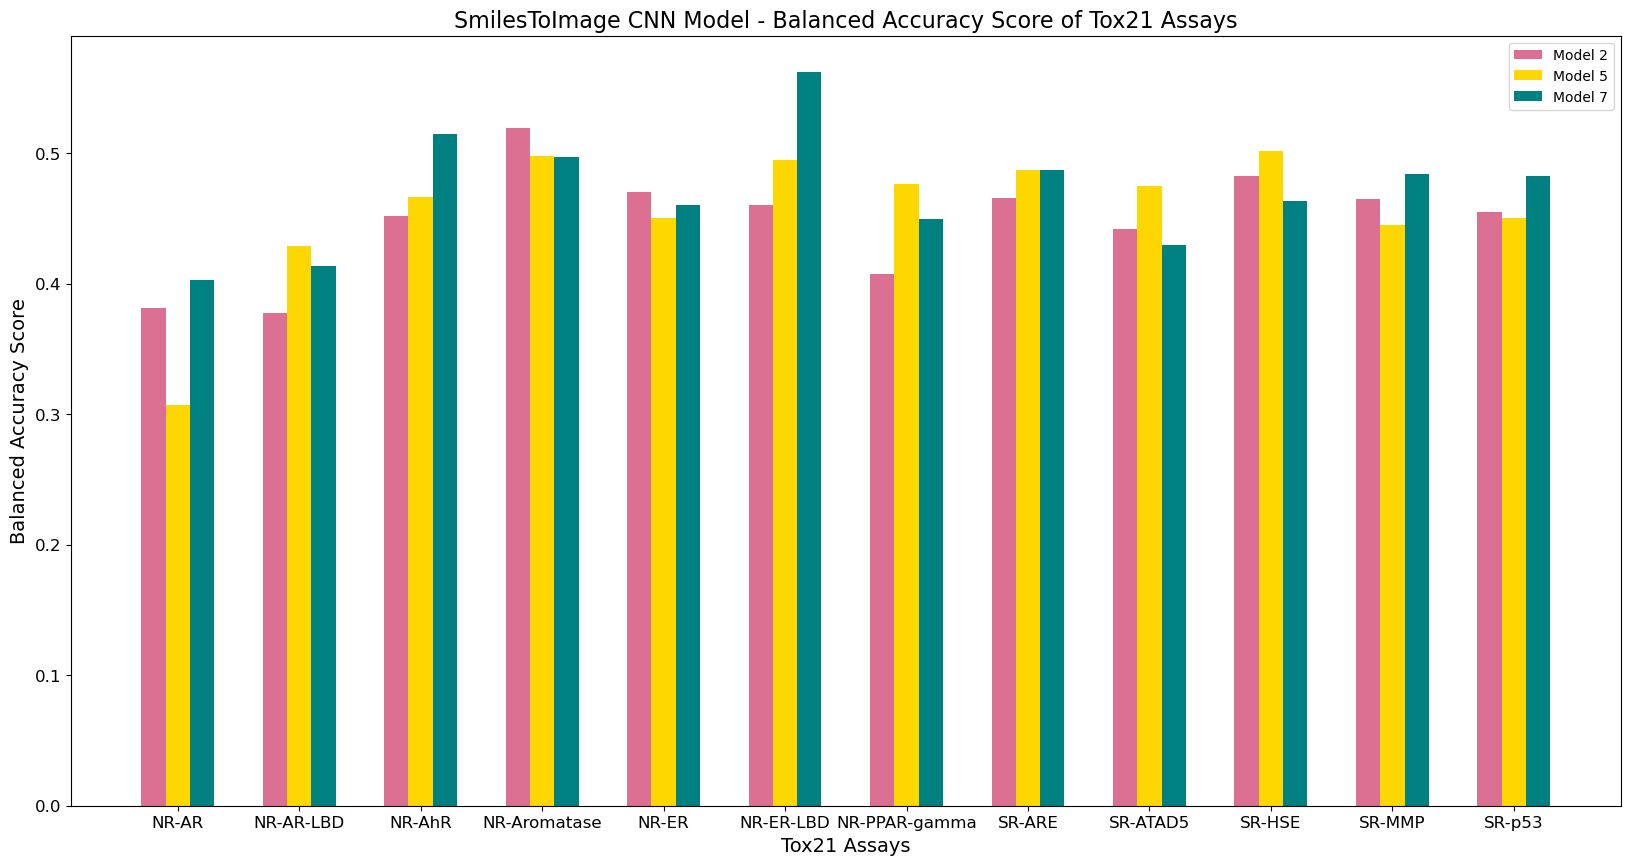

In [139]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_balanced_acc, width, label='Model 2', color='palevioletred')
plt.bar(x, m5_balanced_acc, width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_balanced_acc, width, label='Model 7', color='teal')
plt.title('SmilesToImage CNN Model - Balanced Accuracy Score of Tox21 Assays', fontsize=16)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)
# plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
# plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
# plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
# plt.savefig('Smiles2IMG BA-nolabel.png')

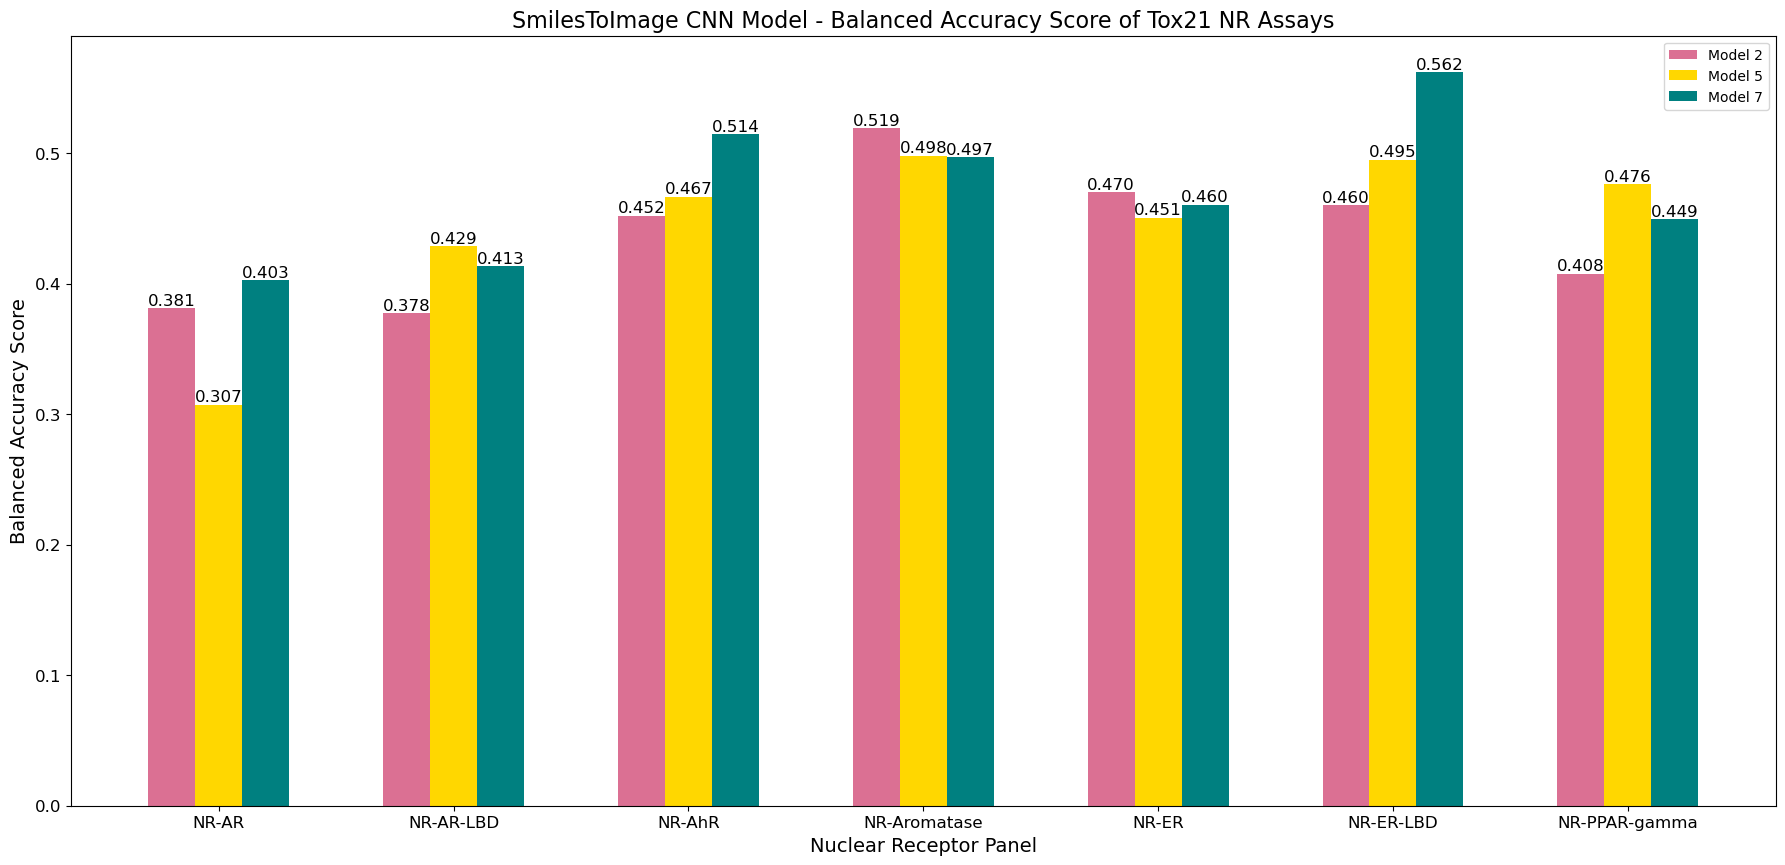

In [153]:
#NR
fig,ax = plt.subplots(figsize=(22,10))

width = 0.2

x=np.arange(7)

plt.bar(x-0.2, m2_balanced_acc[0:7], width, label='Model 2', color='palevioletred')
plt.bar(x, m5_balanced_acc[0:7], width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_balanced_acc[0:7], width, label='Model 7', color='teal')
plt.title('SmilesToImage CNN Model - Balanced Accuracy Score of Tox21 NR Assays', fontsize=16)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.xlabel('Nuclear Receptor Panel', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)
plt.xticks(x, assays[0:7], fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
# plt.savefig('Smiles2IMG BA - NR.png')

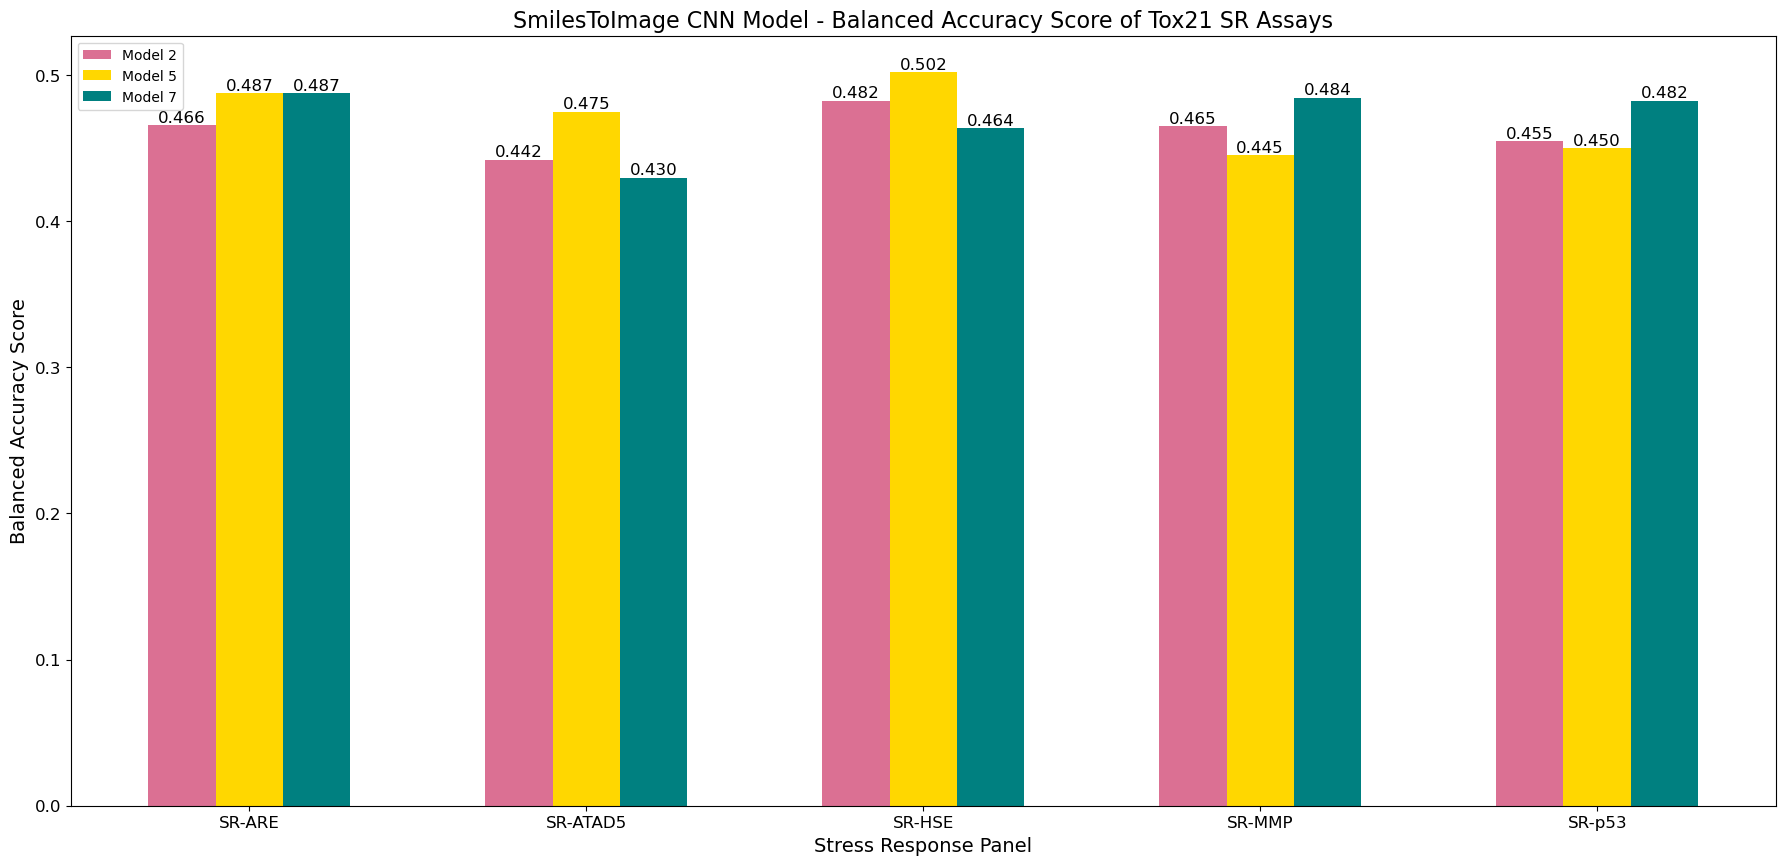

In [155]:
#SR
fig,ax = plt.subplots(figsize=(22,10))

width = 0.2

x=np.arange(5)

plt.bar(x-0.2, m2_balanced_acc[7:12], width, label='Model 2', color='palevioletred')
plt.bar(x, m5_balanced_acc[7:12], width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_balanced_acc[7:12], width, label='Model 7', color='teal')
plt.title('SmilesToImage CNN Model - Balanced Accuracy Score of Tox21 SR Assays', fontsize=16)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.xlabel('Stress Response Panel', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)
plt.xticks(x, assays[7:12], fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
# plt.savefig('Smiles2IMG BA - SR.png')

### F1-Score

In [43]:
def f1Score(y_true, y_pred):
    f1_Score = []
    for i in range(len(y_true)):
        f1 = f1_score(y_true[i], y_pred[i])
        f1_Score.append(f1)
    return f1_Score

In [44]:
m2_f1 = f1Score(y_true, m2_y_pred_new)
m5_f1 = f1Score(y_true, m5_y_pred_new)
m7_f1 = f1Score(y_true, m7_y_pred_new)

In [45]:
f1_means = [np.mean(m2_f1), np.mean(m5_f1), np.mean(m7_f1)]
f1_means

[0.1010173465035933, 0.08693982196735585, 0.09623681858226928]

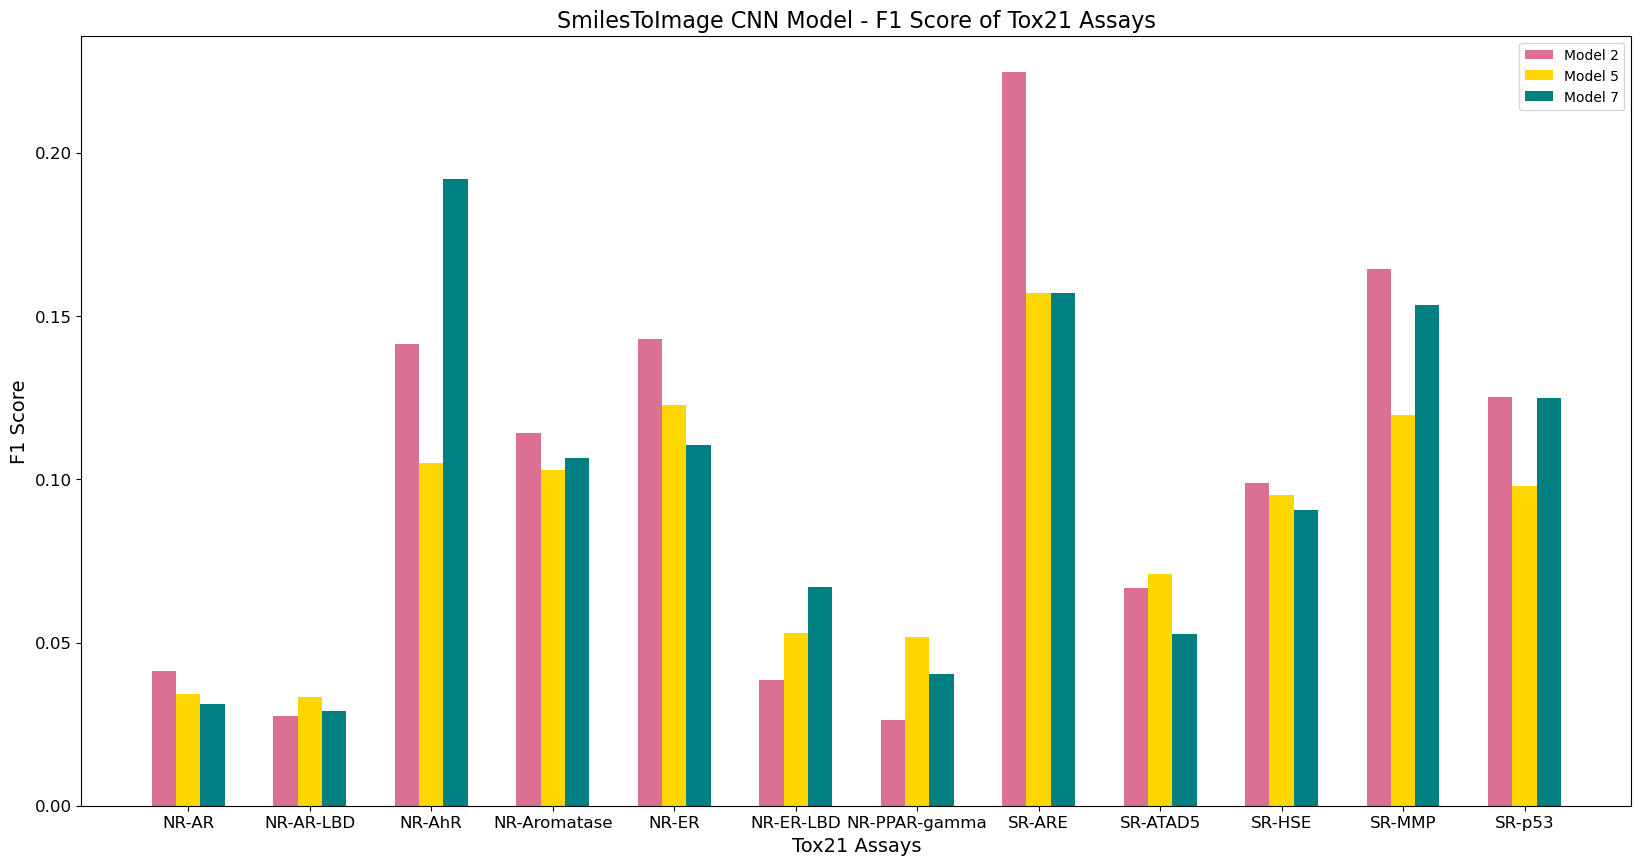

In [140]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_f1, width, label='Model 2', color='palevioletred')
plt.bar(x, m5_f1, width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_f1, width, label='Model 7', color='teal')

plt.title('SmilesToImage CNN Model - F1 Score of Tox21 Assays', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)
# plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
# plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
# plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
# plt.savefig('Smiles2IMG F1-nolabel.png')

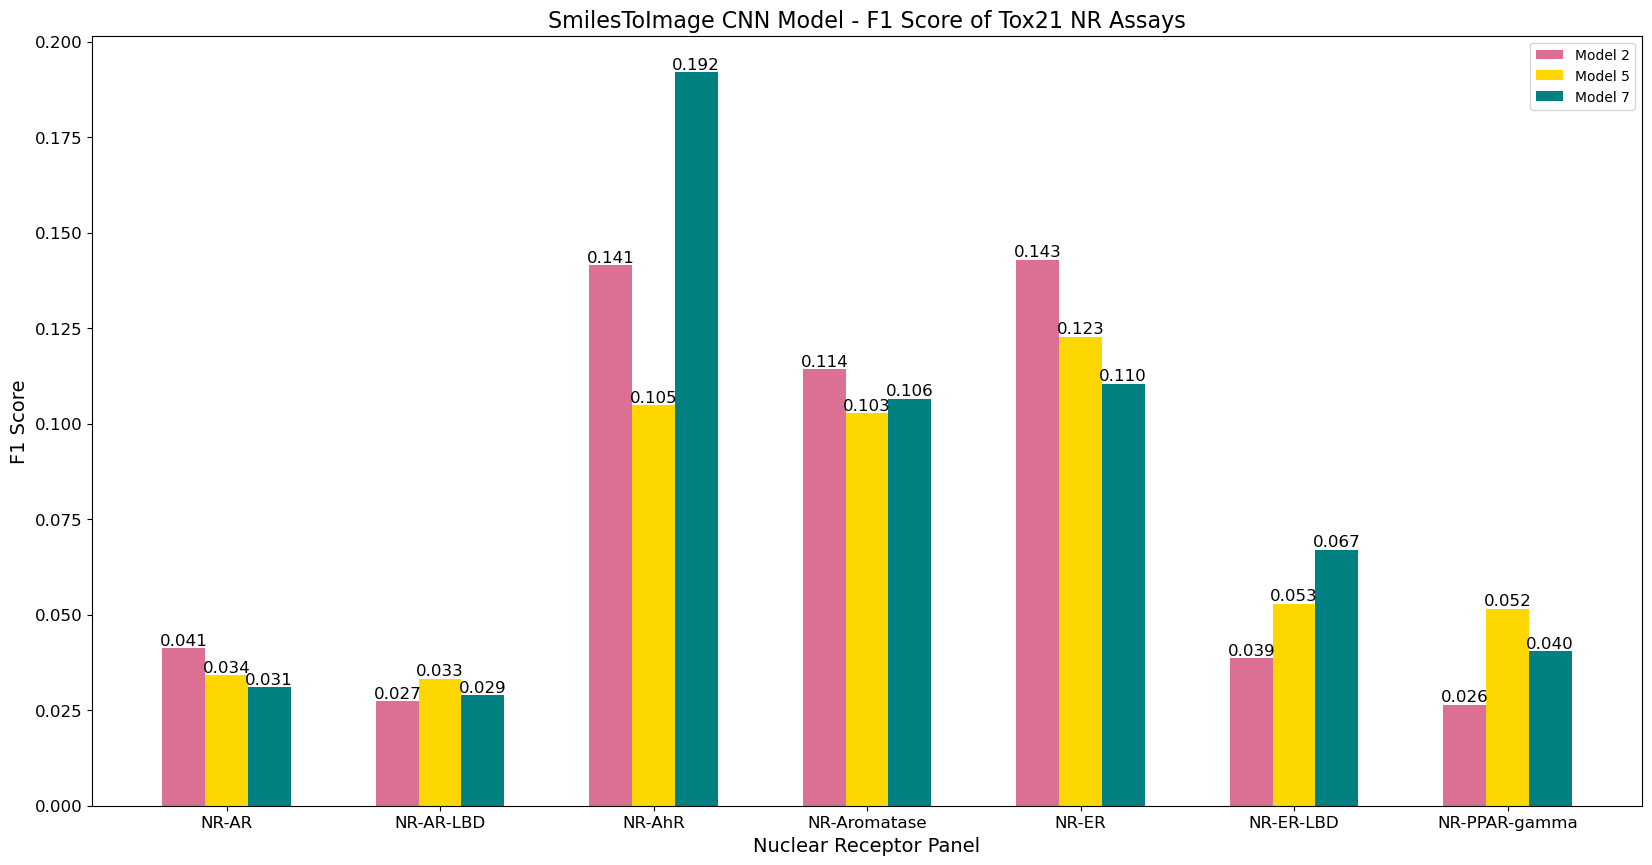

In [156]:
#NR
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(7)
plt.bar(x-0.2, m2_f1[0:7], width, label='Model 2', color='palevioletred')
plt.bar(x, m5_f1[0:7], width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_f1[0:7], width, label='Model 7', color='teal')

plt.title('SmilesToImage CNN Model - F1 Score of Tox21 NR Assays', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.xlabel('Nuclear Receptor Panel', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)
plt.xticks(x, assays[0:7], fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('Smiles2IMG F1-NR.png')

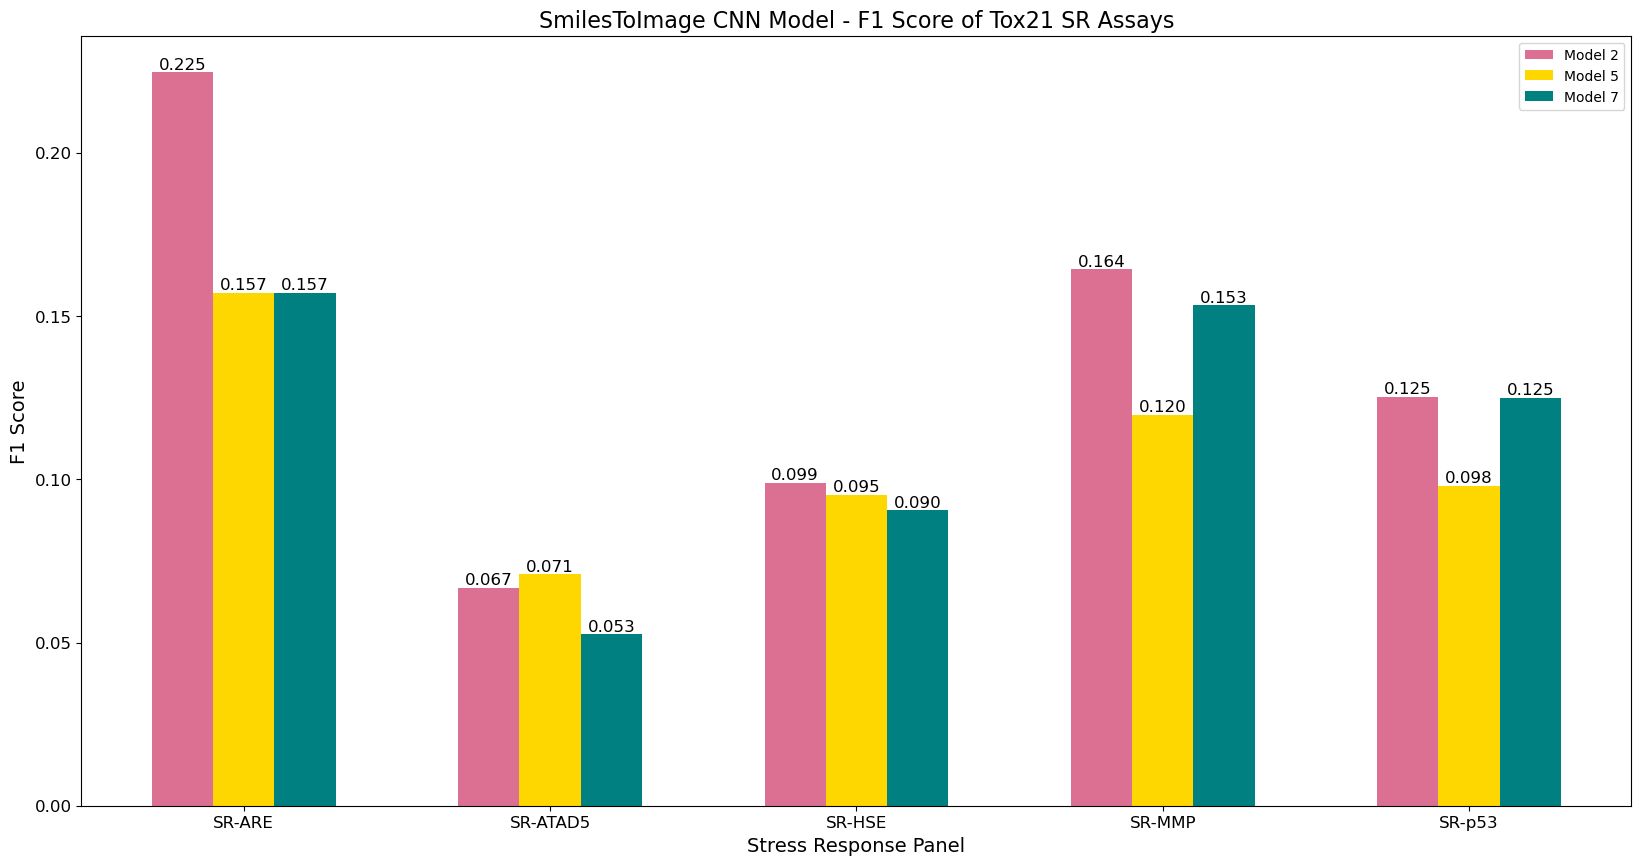

In [157]:
#SR
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(5)
plt.bar(x-0.2, m2_f1[7:12], width, label='Model 2', color='palevioletred')
plt.bar(x, m5_f1[7:12], width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_f1[7:12], width, label='Model 7', color='teal')

plt.title('SmilesToImage CNN Model - F1 Score of Tox21 SR Assays', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.xlabel('Stress Response Panel', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)
plt.xticks(x, assays[7:12], fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('Smiles2IMG F1-SR.png')

### ROC-AUC Score

In [47]:
# Area Under the Receiver Operating Characteristic(ROC) Curve
def roc_auc(y_true, y_pred):
    rocauc=[]
    for i in range(len(y_true)):
        auroc = roc_auc_score(y_true[i], y_pred[i])
        rocauc.append(auroc)
    return rocauc

In [48]:
m2_roc_auc = roc_auc(y_true, m2_y_pred_new)
m5_roc_auc = roc_auc(y_true, m5_y_pred_new)
m7_roc_auc = roc_auc(y_true, m7_y_pred_new)

In [49]:
roc_means = [np.mean(m2_roc_auc), np.mean(m5_roc_auc), np.mean(m7_roc_auc)]
roc_means

[0.44812006635886314, 0.4568393453019006, 0.4705774928418287]

In [50]:
roc_median = [np.median(m2_roc_auc), np.median(m5_roc_auc), np.median(m7_roc_auc)]
roc_median

[0.4574179668134486, 0.47078740494113747, 0.47308914748290376]

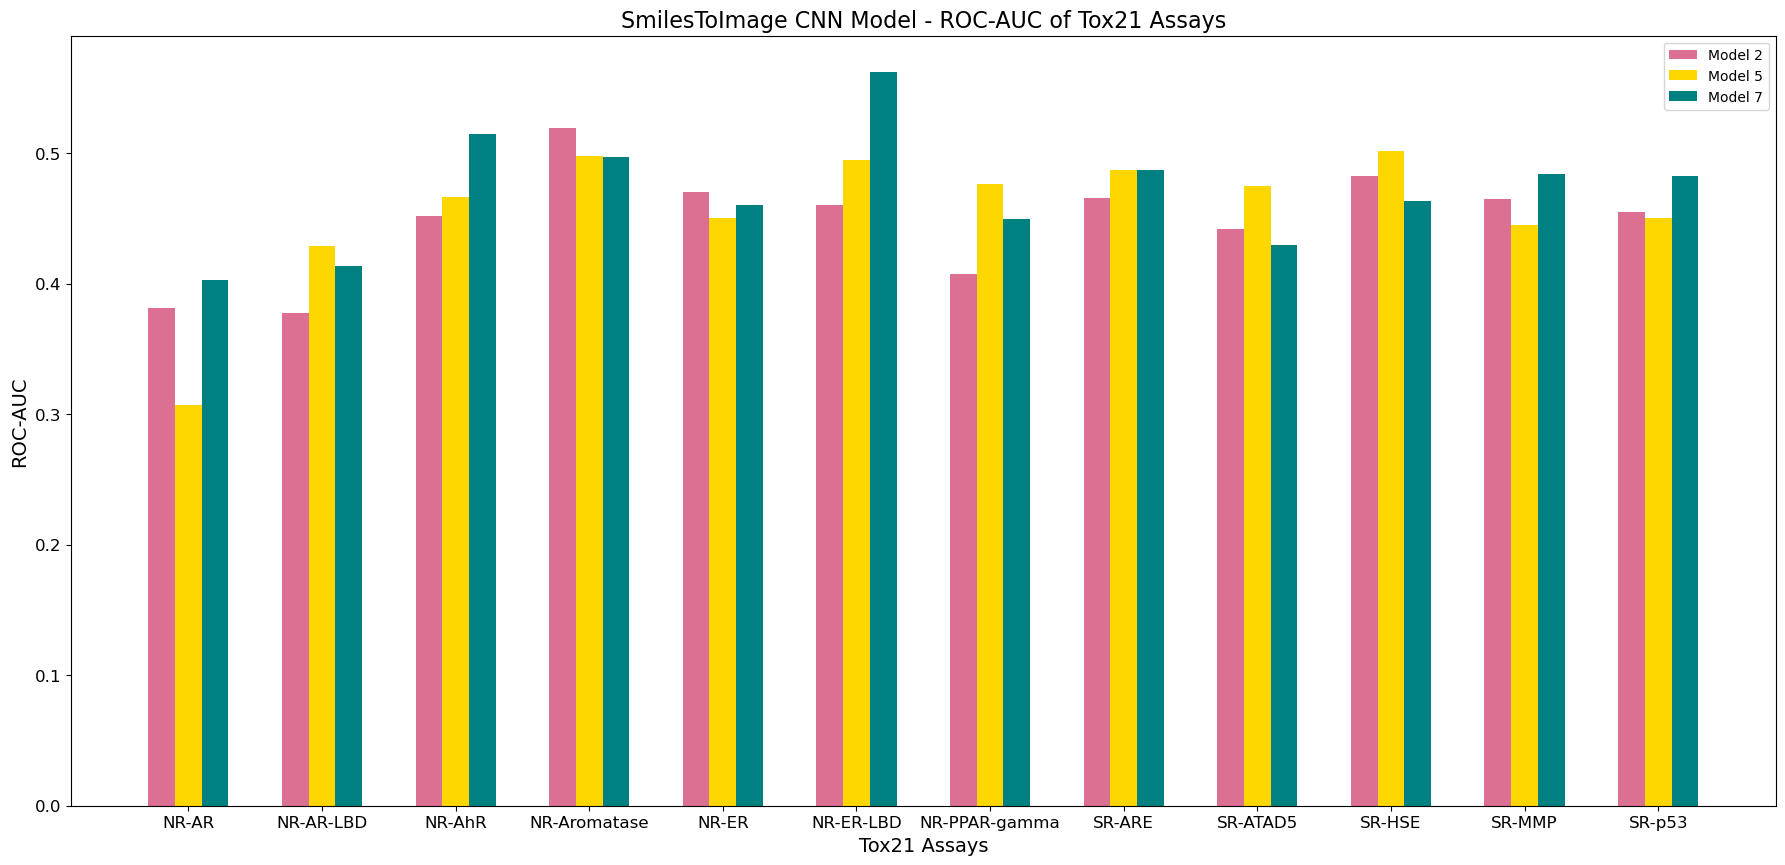

In [148]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(22,10))
width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_roc_auc, width, label='Model 2', color='palevioletred')
plt.bar(x, m5_roc_auc, width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_roc_auc, width, label='Model 7', color='teal')

plt.title('SmilesToImage CNN Model - ROC-AUC of Tox21 Assays', fontsize=16)
plt.ylabel('ROC-AUC', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)
# plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=11)
# plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=11)
# plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=11)
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
# plt.savefig('Smiles2IMG ROC-AUC-nolabel.png')

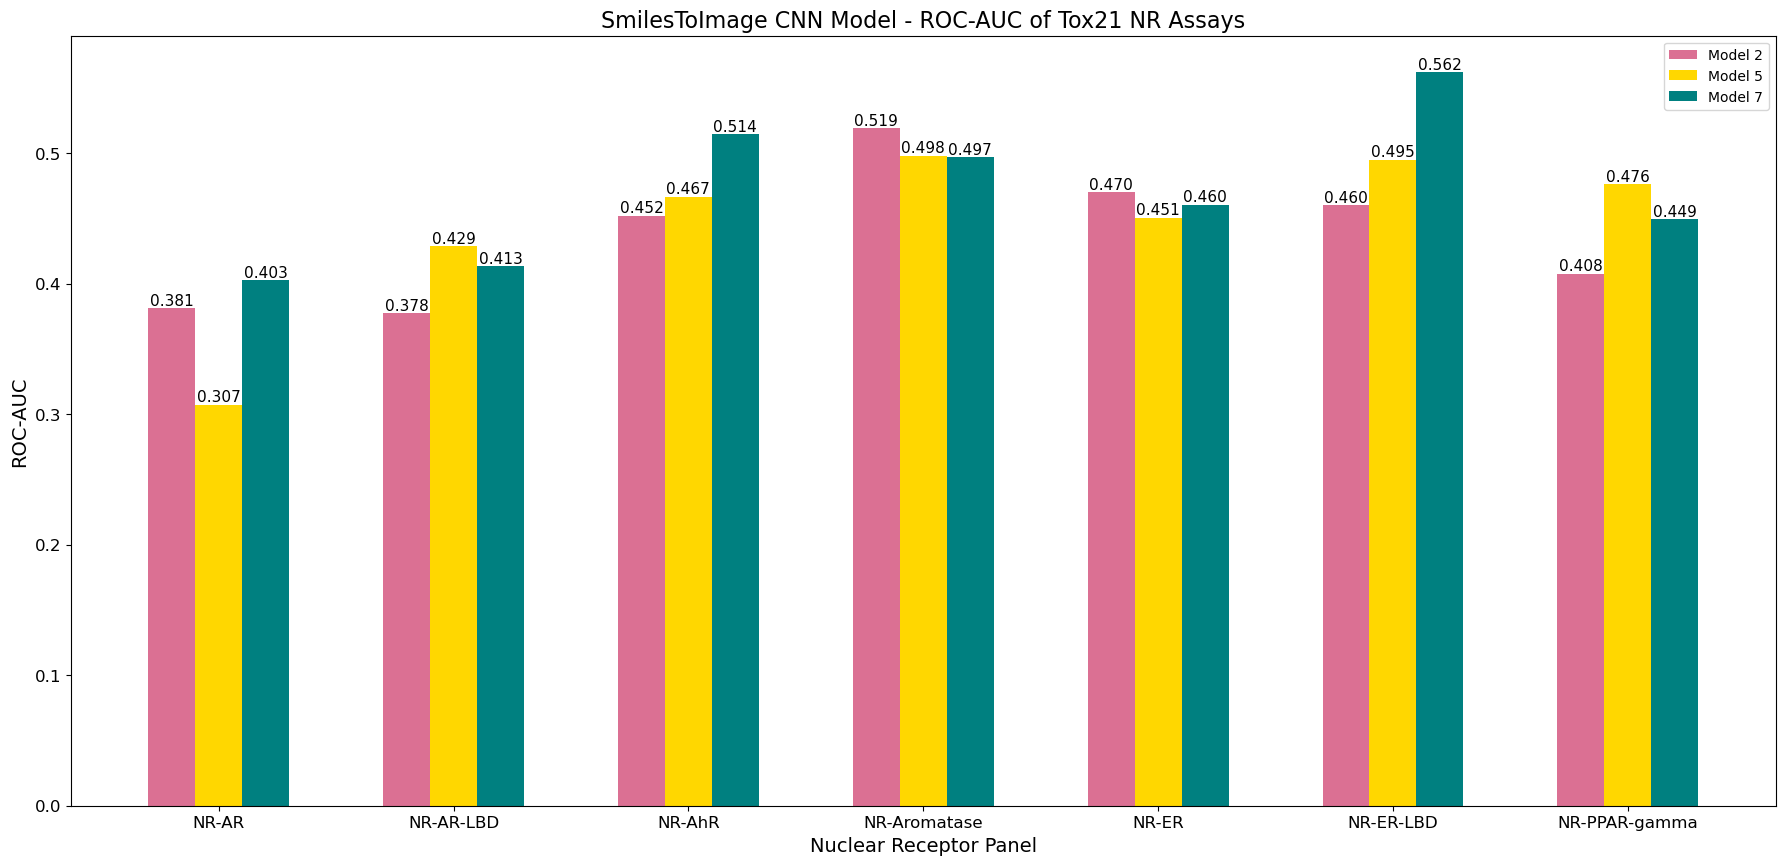

In [158]:
#NR
fig,ax = plt.subplots(figsize=(22,10))
width = 0.2

x=np.arange(7)
plt.bar(x-0.2, m2_roc_auc[0:7], width, label='Model 2', color='palevioletred')
plt.bar(x, m5_roc_auc[0:7], width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_roc_auc[0:7], width, label='Model 7', color='teal')

plt.title('SmilesToImage CNN Model - ROC-AUC of Tox21 NR Assays', fontsize=16)
plt.ylabel('ROC-AUC', fontsize=14)
plt.xlabel('Nuclear Receptor Panel', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=11)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=11)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=11)
plt.xticks(x, assays[0:7], fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('Smiles2IMG ROC-AUC-NR.png')

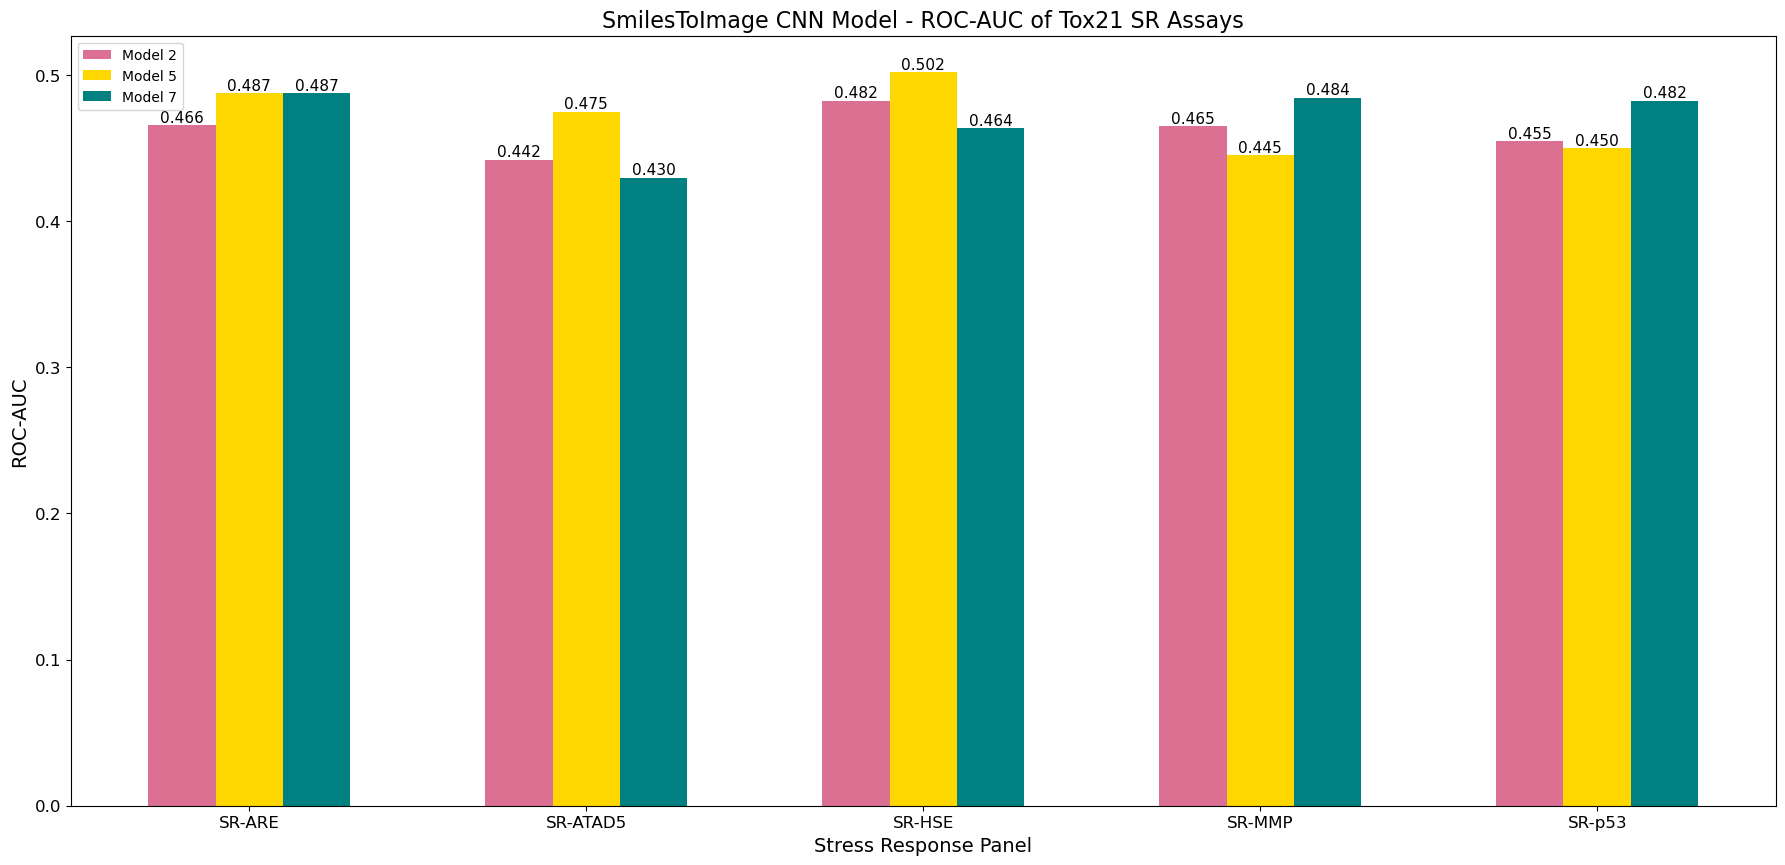

In [159]:
#SR
fig,ax = plt.subplots(figsize=(22,10))
width = 0.2

x=np.arange(5)
plt.bar(x-0.2, m2_roc_auc[7:12], width, label='Model 2', color='palevioletred')
plt.bar(x, m5_roc_auc[7:12], width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_roc_auc[7:12], width, label='Model 7', color='teal')

plt.title('SmilesToImage CNN Model - ROC-AUC of Tox21 SR Assays', fontsize=16)
plt.ylabel('ROC-AUC', fontsize=14)
plt.xlabel('Stress Response Panel', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=11)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=11)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=11)
plt.xticks(x, assays[7:12], fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('Smiles2IMG ROC-AUC-SR.png')

### Splitting datasets with SmilesToImage featuriser

In [52]:
# # #Testing NN with autoencoder and SmilesToImage featuriser
# tasks, datasets, transformers = dc.molnet.load_tox21(featurizer = dc.feat.SmilesToImage(img_size=100, img_spec='std'),
#     save_dir=r'C:\Users\ym20201\Documents\Datasets',
#     data_dir=r'C:\Users\ym20201\Documents\Datasets')

# splitter = dc.splits.RandomSplitter()
# # featurizer = featurizer

# # datasets = tf.data.Dataset.range(3)

# #Split dataset into train,valid,test datasets
# train_data, valid_data,test_data = splitter.train_valid_test_split(
#     datasets[0], 
#     frac_train = 0.8, frac_valid = 0.08, frac_test = 0.12)

# #Featurisation using SmilesToImage
# train_feat = featurizer.featurize(train_data.ids)
# valid_feat = featurizer.featurize(valid_data.ids)
# test_feat = featurizer.featurize(test_data.ids)

# #train_feat = train_feat.astype('float32')/255
# train_feat = train_feat.astype('object')
# # train_feat = train_feat.reshape((len(train_feat), np.prod(train_feat.shape[1:])))


# # # #Converting numpy array to tensor
# train_tensor = tf.convert_to_tensor(train_feat)
# # # train_feat.info()
# # train_feat = np.array(train_feat, dtype=object)
# # #train_feat = np.asarray(train_feat).astype(np.float32)


# autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
# # autoencoder = dc.models.Autoencoder(img_size=256, img_spec = 'flat')
# autoencoder.fit(train_feat,epochs=10)


# ##Use this to plot featurised 2D data
# # plt.imshow(dataset.X[0], interpolation='nearest')
# #plt.show()

In [ ]:
# # #Testing NN with SmilesToImage featuriser
# tasks, datasets, transformers = dc.molnet.load_tox21(
#     save_dir=r'C:\Users\ym20201\Documents\Datasets',
#     data_dir=r'C:\Users\ym20201\Documents\Datasets')

# splitter = dc.splits.RandomSplitter()
# featurizer = dc.feat.SmilesToImage(img_size=80, img_spec='std')

# # datasets = tf.data.Dataset.range(3)

# #Split dataset into train,valid,test datasets
# train_data, valid_data,test_data = splitter.train_valid_test_split(
#     datasets[0], 
#     frac_train = 0.8, frac_valid = 0.08, frac_test = 0.12)

# #Featurisation using SmilesToImage
# train_feat = featurizer.featurize(train_data.ids)
# valid_feat = featurizer.featurize(valid_data.ids)
# test_feat = featurizer.featurize(test_data.ids)

# # plt.imshow(train_feat[0], interpolation='nearest')
# # plt.show()

In [ ]:
# #Filtering out empty arrays in featurised datasets
# train_feat_new = []
# for i in range(len(train_feat)):
#     if train_feat[i].shape != (0,):
#         train_feat_new.append(train_feat[i])
        
# valid_feat_new = []
# for i in range(len(valid_feat)):
#     if valid_feat[i].shape != (0,):
#         valid_feat_new.append(valid_feat[i])

# test_feat_new = []
# for i in range(len(test_feat)):
#     if test_feat[i].shape != (0,):
#         test_feat_new.append(test_feat[i])

In [ ]:
# #Converting numpy array to tensor
# train_tensor = []
# for i in range(len(train_feat_new)):
#     tensor = tf.convert_to_tensor(train_feat_new[i])
#     train_tensor.append(tensor)
    
# valid_tensor = []
# for i in range(len(valid_feat_new)):
#     tensor_v = tf.convert_to_tensor(valid_feat_new[i])
#     valid_tensor.append(tensor_v)
    
# test_tensor = []
# for i in range(len(test_feat_new)):
#     tensor_t = tf.convert_to_tensor(test_feat_new[i])
#     test_tensor.append(tensor_t)

In [ ]:
# plt.savefig('smilestoimg example')

In [ ]:
# Chem.MolFromSmiles(train_data.ids[1])

In [ ]:
# plt.imshow(train_feat_conv[2], interpolation='nearest')

In [ ]:
len(train_data.X[2])

### Autoencoder with 2D convolutional layer

In [ ]:
layers.Conv2D

In [ ]:
# #New autoencoder
# # This is the size of our encoded representations
# encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# #add pooling layers 

# # input_shape = (4, 28, 28, 3)
# # x = tf.random.normal(input_shape)

# input_img = layers.Conv2D(filters=32, kernel_size=3, activation='relu', dilation_rate=2, input_shape=(40,40,1))
# # "encoded" is the encoded representation of the input
# encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = layers.Dense(784, activation='sigmoid')(encoded)

# # This model maps an input to its reconstruction
# autoencoder = keras.Model(input_img, decoded)

# # This model maps an input to its encoded representation
# encoder = keras.Model(input_img, encoded)

# # This is our encoded (32-dimensional) input
# encoded_input = keras.Input(shape=(encoding_dim,))
# # Retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # Create the decoder model
# decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [ ]:
# #Autoencoder Test 2

# encoder_input = layers.Input(shape=(40,40,1))
# input_img = layers.Conv2D(filters=32,
#                           kernel_size=3,
#                           activation='relu',
#                           dilation_rate=2)(encoder_input)
# encoded = layers.Dense(64, activation='relu')(input_img)
# encoder = keras.Model(encoder_input, encoded)

# # Create the decoder
# decoder_input = layers.Input(shape=(64,))
# decoded = layers.Dense(784, activation='sigmoid')(decoder_input)
# decoder = keras.Model(decoder_input, decoded)

# # Create the autoencoder
# autoencoder = keras.Model(encoder_input, decoder(encoder(encoder_input)))

In [ ]:
#New autoencoder - modified
#Simple convolutional autoencoder
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

#add pooling layers 

input_img = layers.Input(shape=(40,40,1))
Conv2d_1 = layers.Conv2D(filters=32,
                          kernel_size=3,
                          activation='relu',
                          dilation_rate=2)(input_img)

#add pooling layer
#add flatten layer before dense

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(Conv2d_1)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='relu')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [ ]:
#Adding more layers- Convolutional autoencoder

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

#add pooling layers 

input_img = layers.Input(shape=(40,40,1))
Conv2D_1 = layers.Conv2D(filters=32,
                          kernel_size=3,
                          activation='relu',
                          dilation_rate=2)(input_img)

MaxPool2D_1 = layers.MaxPooling2D((2, 2), padding='same')(Conv2D_1)
Conv2D_2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(MaxPool2D_1)
MaxPool2D_2 = layers.MaxPooling2D((2, 2), padding='same')(Conv2D_2)
Flatten = layers.Flatten()(MaxPool2D_2)
encoded = layers.Dense(encoding_dim, activation='relu')(Flatten)

# "encoded" is the encoded representation of the input
# encoded = layers.Dense(encoding_dim, activation='relu')(input)
# encoded = layers.MaxPooling2D(pool_size=(2,2), padding='same')(encoded)
# encoded = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
# x = layers.Dense(encoding_dim, activation='relu')(x)
# x = layers.MaxPooling2D(pool_size=(2,2), padding='same')(x)
# x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# encoded = layers.MaxPooling2D(pool_size=(2,2), padding='same')(x)


# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='relu')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [ ]:
# # From keras blog
# input_img = layers.Input(shape=(80, 80, 1))

# Conv2D_1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# x = layers.MaxPooling2D((2, 2), padding='same')(Conv2D_1)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# # at this point the representation is (4, 4, 8) i.e. 128-dimensional

# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(16, (3, 3), activation='relu')(x)
# x = layers.UpSampling2D((2, 2))(x)
# decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


# # This model maps an input to its reconstruction
# autoencoder = keras.Model(input_img, decoded)


In [ ]:
#Compile autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

In [ ]:
print(train_tensor[0].shape)

In [ ]:
print(train_tensor[10].shape)
print(len(train_tensor))
print(valid_tensor[10].shape)
print(len(valid_tensor))

In [ ]:
#Training the autoencoder
autoencoder_test = autoencoder.fit(x=train_tensor,
                                   y=train_tensor,
                                   epochs=10,
                                   batch_size=512,
                                   shuffle=True,
                                  validation_data=(valid_tensor, valid_tensor))

In [ ]:
# tasks, datasets, transformers = dc.molnet.load_tox21()
# train_data, valid_data, test_data = datasets

# featurizer = dc.feat.Smiles2Img(img_size=256, img_spec='flat')
# train_feat = featurizer.featurise(train_data.X)
# ...

# autoencoder = dc.models.Autoencoder(img_size=256, img_spec = 'flat')
# autoencoder.fit(train_feat)

# metrics = dc.metrics
# train_scores = autoencoder.evaluate(train_feat, [metric])